# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

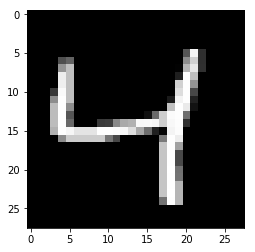

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1]
print(image_size)
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

784


## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6879
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6800
Epoch: 1/20... Training loss: 0.6748
Epoch: 1/20... Training loss: 0.6682
Epoch: 1/20... Training loss: 0.6604
Epoch: 1/20... Training loss: 0.6518
Epoch: 1/20... Training loss: 0.6430
Epoch: 1/20... Training loss: 0.6311
Epoch: 1/20... Training loss: 0.6182
Epoch: 1/20... Training loss: 0.6040
Epoch: 1/20... Training loss: 0.5883
Epoch: 1/20... Training loss: 0.5730
Epoch: 1/20... Training loss: 0.5583
Epoch: 1/20... Training loss: 0.5424
Epoch: 1/20... Training loss: 0.5278
Epoch: 1/20... Training loss: 0.5026
Epoch: 1/20... Training loss: 0.4899
Epoch: 1/20... Training loss: 0.4683
Epoch: 1/20... Training loss: 0.4556
Epoch: 1/20... Training loss: 0.4411
Epoch: 1/20... Training loss: 0.4254
Epoch: 1/20... Training loss: 0.4107
Epoch: 1/20... Training loss: 0.3927
Epoch: 1/20... Training loss: 0.3851
E

Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1841
E

Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1485
E

Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1268
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1319
E

Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1220
E

Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1168
E

Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1047
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1009
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1090
E

Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.0989
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.0988
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1022
E

Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.1026
E

Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0936
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0963
E

Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1017
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0943
E

Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.1026
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0895
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.1008
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0883
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0879
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0874
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

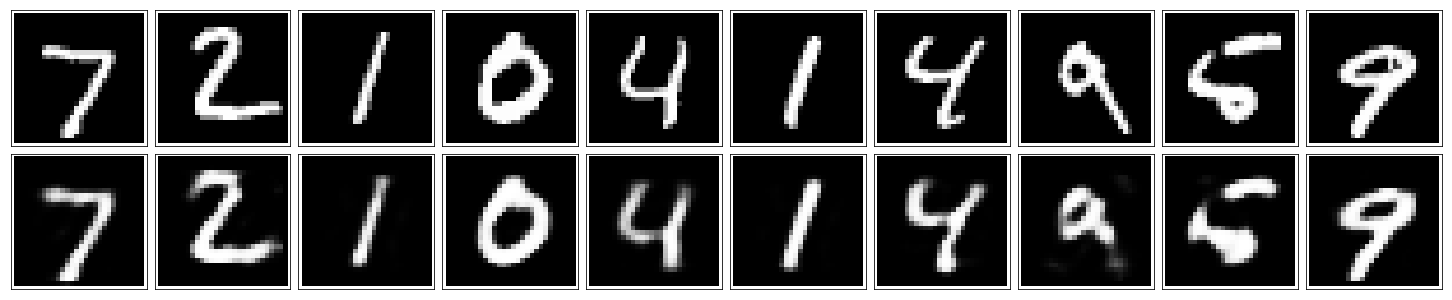

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.